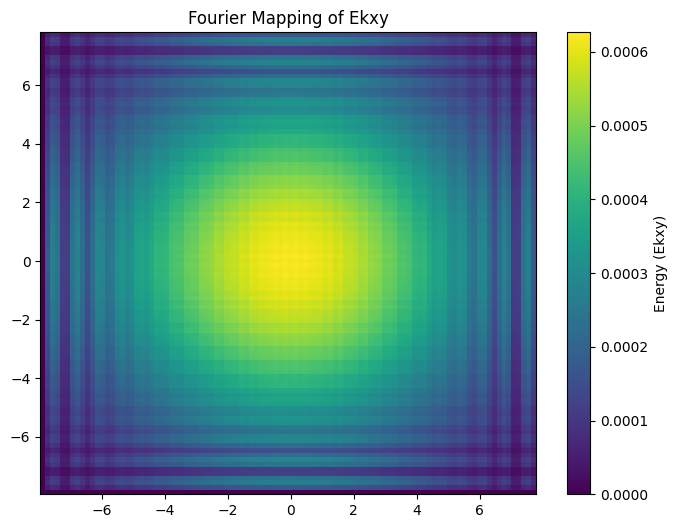

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N = 100 # Spatial Resolution
kx = np.linspace(-np.pi, np.pi, N)
ky = np.linspace(-np.pi, np.pi, N)

# Example parameters for the beam waist and energy function
w0 = 1  # Example beam waist
Ekxy = w0**2 /4/np.pi * np.exp(-w0**2/4. * (kx[:, None]**2 + ky[None, :]**2))  # Example energy function
k = 0.1  # Example wave number
z = 2  # Example propagation distance
z0 =  k*w0**2/2 # Rayleigh range

def Fourier_Mapping(Ekxy, kx, ky, k, z):
    # Create 2D grids
    KX, KY = np.meshgrid(kx, ky)

    # Transfer function
    H = np.exp(-0.5j * (KX**2 + KY**2) * z / k)  # Example transfer function
    Ekxyz = Ekxy * H   # Apply transfer function
    Exyz = np.fft.ifft2(Ekxyz)  # Inverse Fourier transform to get spatial domain
    Exyz = np.fft.fftshift(Exyz)  # Shift zero-frequency component to center
    x = np.fft.fftshift(np.fft.fftfreq(len(kx), d=(kx[1] - kx[0])))
    y = np.fft.fftshift(np.fft.fftfreq(len(ky), d=(ky[1] - ky[0])))
    X, Y = np.meshgrid(x,y)  # Create meshgrid for plotting

    # Now KX and KY are 2D arrays representing the grid
    plt.figure(figsize=(8, 6))
    plt.pcolormesh(X, Y, np.abs(Exyz), shading='auto', cmap='viridis')
    plt.colorbar(label='Energy (Ekxy)')
    plt.title('Fourier Mapping of Ekxy')

Fourier_Mapping(Ekxy, kx, ky, k, z) 